In [45]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score  # Regression Metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv("./CO2 Emissions_Canada.csv")

In [47]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### There are a combination of categorical and numerical columns

In [48]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### Seems that data is clear in all columns from nulls , well let's see NaN values

In [49]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### Same here for NaN values.Clear!

### Let's dive in dataset and get some insights

In [50]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
Numerical Columns: ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [51]:
print(f"Length of numerical cols : {len(numerical_cols)}")  
print(f"Length of categorical cols : {len(categorical_cols)}")  

Length of numerical cols : 7
Length of categorical cols : 5


In [52]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

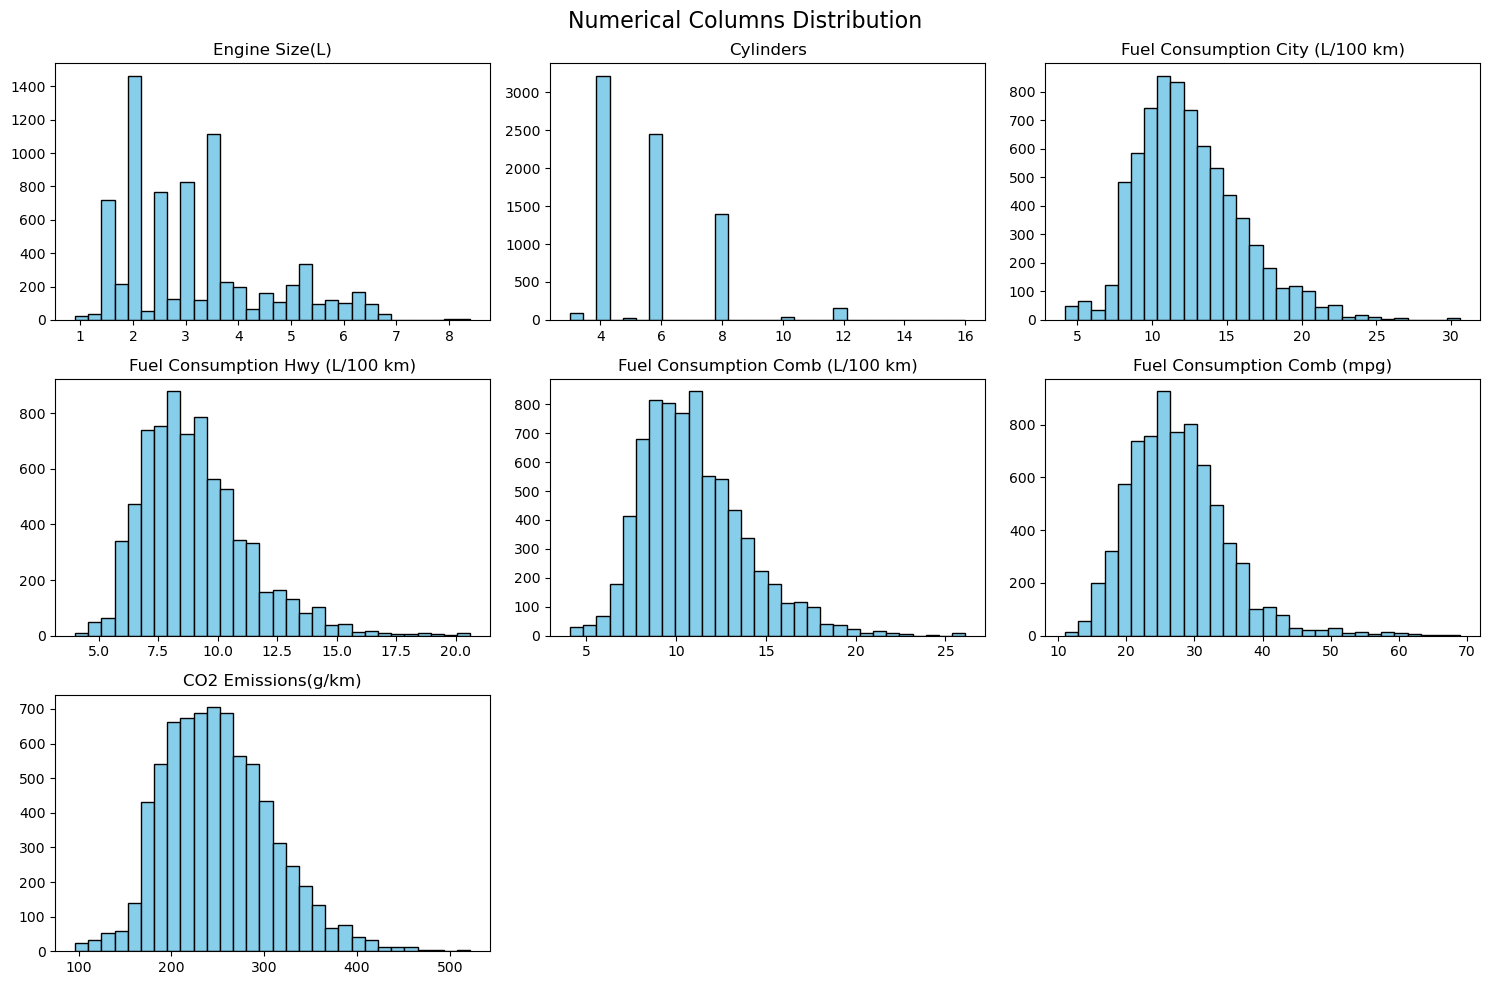

In [53]:
import matplotlib.pyplot as plt

# Create a 3x3 grid for numerical columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Numerical Columns Distribution", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')  # Histogram
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Numerical cols tends to be generally-normal distributed , Friendly to ML Models :)

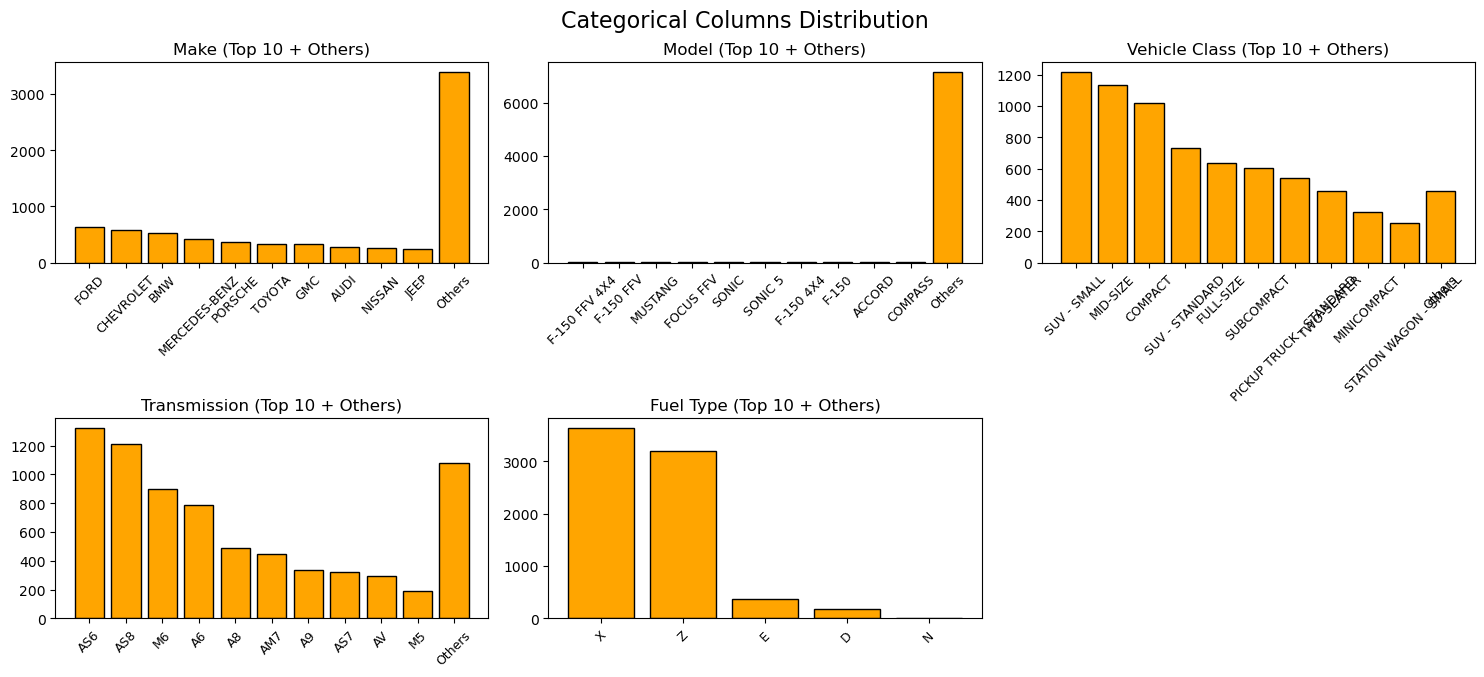

In [54]:
import matplotlib.pyplot as plt

# Define number of categories to show
top_n = 10  # Show only the top 10 most frequent categories

# Create a 3x3 grid for categorical columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Categorical Columns Distribution", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()

    # If too many unique values, show only the top N and group the rest as "Others"
    if len(counts) > top_n:
        counts = counts.nlargest(top_n)
        counts["Others"] = df[col].value_counts().iloc[top_n:].sum()  # Sum the rest into "Others"

    # Bar plot
    axes[i].bar(counts.index, counts.values, color='orange', edgecolor='black')
    axes[i].set_title(col + f" (Top {top_n} + Others)")
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)  # Rotate labels for readability

# Hide any unused subplots
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Categorical cols tend to skewness , No problem still the dataset valuable for ML

In [55]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [56]:
df.sum()

Make                                ACURAACURAACURAACURAACURAACURAACURAACURAACURAA...
Model                               ILXILXILX HYBRIDMDX 4WDRDX AWDRLXTLTL AWDTL AW...
Vehicle Class                       COMPACTCOMPACTCOMPACTSUV - SMALLSUV - SMALLMID...
Engine Size(L)                                                                23337.1
Cylinders                                                                       41467
Transmission                        AS5M6AV7AS6AS6AS6AS6AS6M6AS5M6AS5AM6A6A6AM7M6A...
Fuel Type                           ZZZZZZZZZZZZZZZZZZZZZZZZZZZZDZDZZDZZZDZZZDZZDZ...
Fuel Consumption City (L/100 km)                                              92730.0
Fuel Consumption Hwy (L/100 km)                                               66773.0
Fuel Consumption Comb (L/100 km)                                              81050.9
Fuel Consumption Comb (mpg)                                                    202952
CO2 Emissions(g/km)                                   

### Dataset rows = 7386 (From csv file [excel sheet])

In [57]:
len(df)

7385

### The Correct way to count the data in python ^^^^ len

In [58]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
df_encoded = df.copy()  # Create a copy to avoid modifying the original data

# Apply Label Encoding to all categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


In [61]:
df_encoded

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


### let's continue with df_encoded instead of df

In [62]:
df_encoded.dtypes

Make                                  int32
Model                                 int32
Vehicle Class                         int32
Engine Size(L)                      float64
Cylinders                             int64
Transmission                          int32
Fuel Type                             int32
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

### Great! let's now see the correlation matrix (All data are numerical now[ML-friendly])

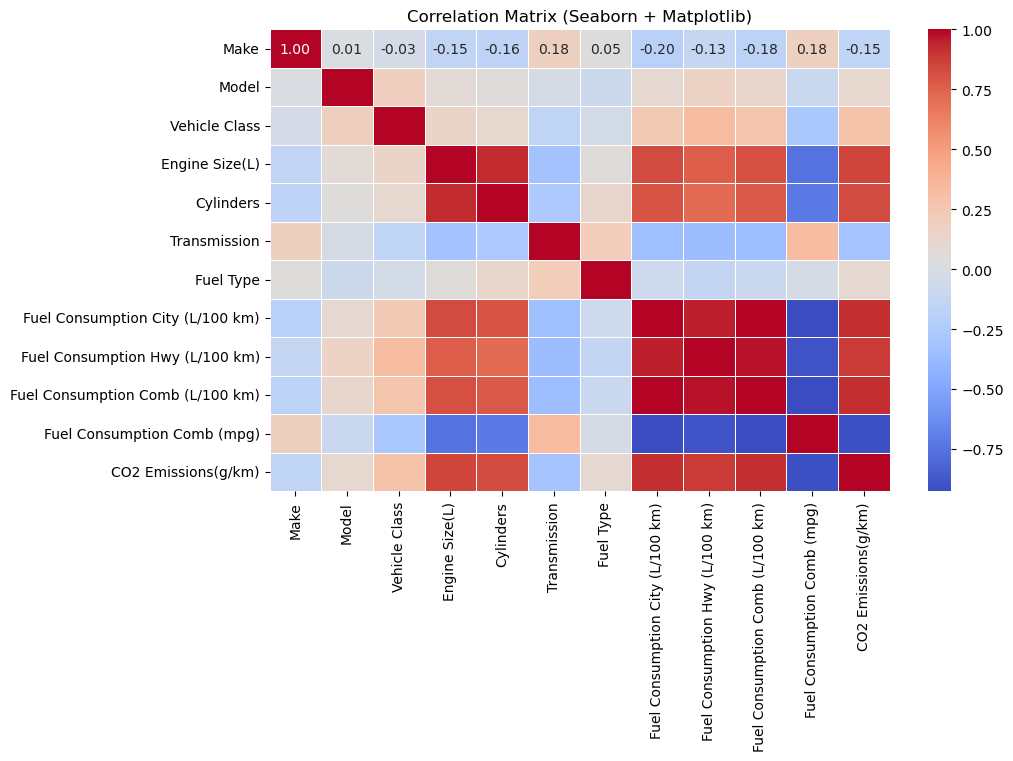

In [63]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix (Seaborn + Matplotlib)")

# Show plot
plt.show()


### Gradients near to red has a strong correlation. but from my experience , entire dataset still valuable

In [64]:
df_encoded.dtypes

Make                                  int32
Model                                 int32
Vehicle Class                         int32
Engine Size(L)                      float64
Cylinders                             int64
Transmission                          int32
Fuel Type                             int32
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [65]:
df_encoded['CO2 Emissions(g/km)']

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [66]:
df_encoded.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [67]:
# Define the target column
target_col = "CO2 Emissions(g/km)"

# Separate features (X) and target (y)
X = df_encoded.drop(columns=[target_col])  # All columns except target
y = df_encoded[target_col]  # Target column remains unchanged

# Apply StandardScaler to X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Convert back to DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print results
print(X_scaled.head())  # Check the first few rows

       Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0 -1.730214  0.057785      -1.319720       -0.856721  -0.883408     -0.003824   
1 -1.730214  0.057785      -1.319720       -0.561317  -0.883408      1.511325   
2 -1.730214  0.059519      -1.319720       -1.225976  -0.883408      1.098102   
3 -1.730214  0.362820       0.961192        0.251043   0.210575      0.133917   
4 -1.730214  0.823839       0.961192        0.251043   0.210575      0.133917   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0   0.836161                         -0.759002   
1   0.836161                         -0.387577   
2   0.836161                         -1.873275   
3   0.836161                          0.040990   
4   0.836161                         -0.130437   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.052781                         -0.855742   
1                        -0.603202                         -0.475423

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:


# Step 1: Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate Model Performance
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 17.18
R² Score: 0.91


In [70]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


# Define models with hyperparameter grids
models = {
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.01, 0.1, 1, 10, 100]}  # Tune L2 regularization strength
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.01, 0.1, 1, 10, 100]}  # Tune L1 regularization strength
    }
}

# Train each model using GridSearchCV
best_models = {}
for name, m in models.items():
    grid = GridSearchCV(m["model"], m["params"], cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    
    # Predictions & Evaluation
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    best_models[name] = {"model": best_model, "RMSE": rmse, "R²": r2}
    
    # Print Results
    print(f" {name} - Best Alpha: {grid.best_params_}")
    print(f" RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

# Find best-performing model
best_model_name = max(best_models, key=lambda x: best_models[x]["R²"])
print(f" Best Model: {best_model_name} with R² = {best_models[best_model_name]['R²']:.2f}")


 Ridge Regression - Best Alpha: {'alpha': 10}
 RMSE: 17.19, R²: 0.91

 Lasso Regression - Best Alpha: {'alpha': 0.01}
 RMSE: 17.19, R²: 0.91

 Best Model: Ridge Regression with R² = 0.91


In [71]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Split dataset (same as before)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models with hyperparameter grids
models = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {"n_estimators": [100, 200], "max_depth": [10, 20], "min_samples_split": [2, 5]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [3, 5]}
    }
}

# Train each model using GridSearchCV
best_models = {}
for name, m in models.items():
    grid = GridSearchCV(m["model"], m["params"], cv=3, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    
    # Predictions & Evaluation
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    best_models[name] = {"model": best_model, "RMSE": rmse, "R²": r2}
    
    # Print Results
    print(f"🔹 {name} - Best Model: {grid.best_params_}")
    print(f"✅ RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

# Find best-performing model
best_model_name = max(best_models, key=lambda x: best_models[x]["R²"])
print(f"🏆 Best Model: {best_model_name} with R² = {best_models[best_model_name]['R²']:.2f}")


🔹 Random Forest - Best Model: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
✅ RMSE: 2.78, R²: 1.00

🔹 Gradient Boosting - Best Model: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
✅ RMSE: 2.64, R²: 1.00

🏆 Best Model: Gradient Boosting with R² = 1.00


In [72]:
# Step 2: Define models with optimized hyperparameter grids
models = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],  # Reduce number of trees
            "max_depth": [5, 10],  # Lower depth to prevent overfitting
            "min_samples_split": [5, 10]  # Prevent small splits
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],  # Reduce trees to avoid overfitting
            "learning_rate": [0.05, 0.1],  # Lower learning rate for better generalization
            "max_depth": [3, 5],  # Shallower trees prevent overfitting
            "subsample": [0.8, 1.0]  # Adds randomness to improve generalization
        }
    }
}

# Step 3: Train each model using GridSearchCV
best_models = {}
for name, m in models.items():
    grid = GridSearchCV(m["model"], m["params"], cv=3, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    
    # Step 4: Make Predictions
    y_pred = best_model.predict(X_test)
    
    # Step 5: Evaluate Model Performance
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score
    
    # Store results
    best_models[name] = {"model": best_model, "RMSE": rmse, "R²": r2}
    
    # Print Results
    print(f" {name} - Best Params: {grid.best_params_}")
    print(f" RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

# Step 6: Find Best Performing Model
best_model_name = max(best_models, key=lambda x: best_models[x]["R²"])
print(f" Best Model: {best_model_name} with R² = {best_models[best_model_name]['R²']:.2f}")

 Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
 RMSE: 2.82, R²: 1.00

 Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
 RMSE: 2.81, R²: 1.00

 Best Model: Gradient Boosting with R² = 1.00


In [73]:
from sklearn.svm import SVR
# Step 2: Define SVR with hyperparameter grid
svr_params = {
    "C": [0.1, 1, 10],         # Regularization parameter (higher C = less regularization)
    "kernel": ["linear", "rbf"],  # Try both linear and RBF kernels
    "epsilon": [0.01, 0.1, 1]   # Defines margin of tolerance for errors
}

# Step 3: Train SVR using GridSearchCV
grid = GridSearchCV(SVR(), svr_params, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

# Step 4: Get the best model
best_svr = grid.best_estimator_

# Step 5: Make Predictions
y_pred = best_svr.predict(X_test)

# Step 6: Evaluate Model Performance
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Step 7: Print Results
print(f" Best SVR Model: {grid.best_params_}")
print(f" RMSE: {rmse:.2f}, R²: {r2:.2f}")

 Best SVR Model: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
 RMSE: 5.71, R²: 0.99


### Seems that we have here 2 models are the optimal solution , Linear Regression and Support Vector Regressor SVR

In [74]:
# from sklearn.linear_model import SGDRegressor
# # Step 2: Define SGDRegressor with hyperparameter grid
# sgd_params = {
#     "alpha": [0.0001, 0.001, 0.01, 0.1],  # Regularization strength (L2 penalty)
#     "max_iter": [1000, 5000, 10000],      # Maximum iterations
#     "tol": [1e-3, 1e-4, 1e-5],            # Stopping criterion tolerance
#     "penalty": ["l2", "l1", "elasticnet"], # Regularization type
#     "learning_rate": ["constant", "optimal", "adaptive"] # Learning rate strategy
# }

# # Step 3: Train SGDRegressor using GridSearchCV
# grid = GridSearchCV(SGDRegressor(random_state=42), sgd_params, cv=3, scoring="r2", n_jobs=-1)
# grid.fit(X_train, y_train)

# # Step 4: Get the best model
# best_sgd = grid.best_estimator_

# # Step 5: Make Predictions
# y_pred = best_sgd.predict(X_test)

# # Step 6: Evaluate Model Performance
# rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)  # R² Score

# # Step 7: Print Results
# print(f" Best SGD Regressor Model: {grid.best_params_}")
# print(f" RMSE: {rmse:.2f}, R²: {r2:.2f}")

### Appears that SGD has the largest computational cost here (1min 14 sec execution) with the same values for linear regression , Linear Regression is the best definitly

In [75]:
model

LinearRegression()

### Residual Plot (Errors vs Predictions)

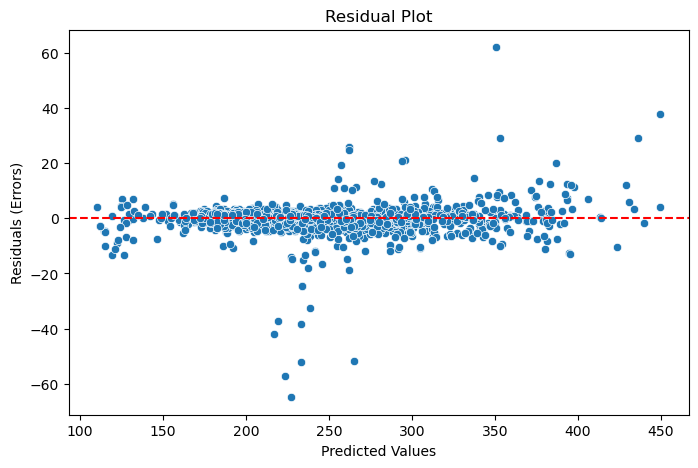

In [76]:

residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

#### A good model has residuals randomly scattered around zero

#### Actual vs Predicted Plot

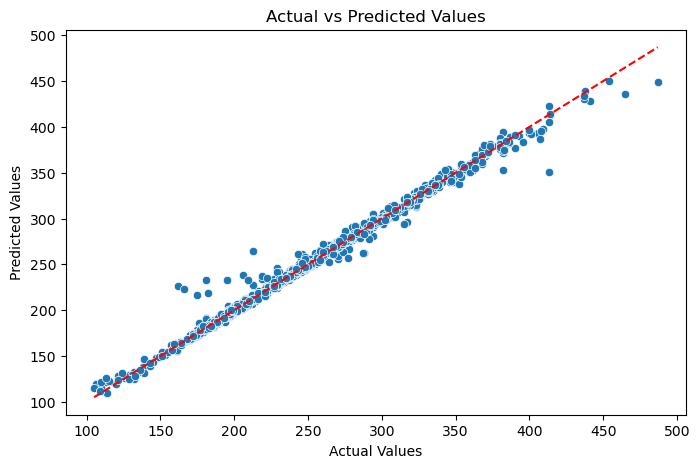

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Tend to be acceptable model , act. vs pred. near to red line

c:\Users\Future Line\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


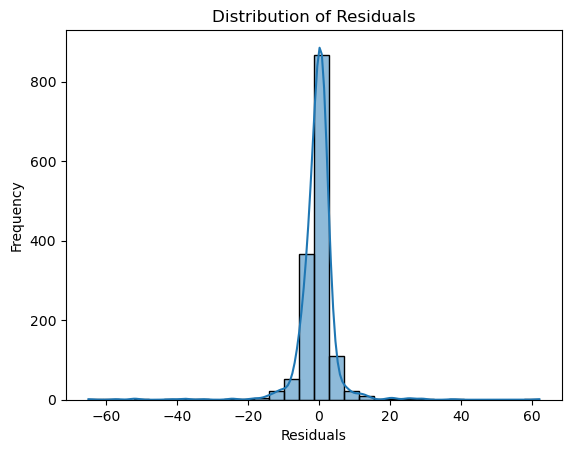

In [78]:
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#### Distribution of Errors

### Good model :A normal (bell-shaped) residual distribution suggests a well-fitted model

## Input in the lower cell what values you need to predict

In [79]:
#  Step 1: Provide new raw input data (before scaling)
new_data = np.array([[0, 1200, 10, 2.5, 4, 18, 4, 10.5, 7.0, 8.8, 31]])  # Example raw values

#  Step 2: Scale the new input using the same scaler
new_data_scaled = scaler.transform(new_data)  # Scale new input

#  Step 3: Predict CO₂ Emissions
predicted_co2 = model.predict(new_data_scaled)

print(f" Predicted CO₂ Emissions: {predicted_co2[0]:.2f} g/km")

 Predicted CO₂ Emissions: 217.72 g/km


c:\Users\Future Line\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Future Line\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### *Next Stage*

In [80]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [81]:
# Define features and target
selected_features = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)']
df_new = df[selected_features]

In [82]:
df_new

,Make,Model,Vehicle Class,Engine Size(L),Transmission,Fuel Type,Fuel Consumption Hwy (L/100 km)
0,ACURA,ILX,COMPACT,2.0,AS5,Z,6.7
1,ACURA,ILX,COMPACT,2.4,M6,Z,7.7
2,ACURA,ILX HYBRID,COMPACT,1.5,AV7,Z,5.8
3,ACURA,MDX 4WD,SUV - SMALL,3.5,AS6,Z,9.1
4,ACURA,RDX AWD,SUV - SMALL,3.5,AS6,Z,8.7
...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,AS8,Z,7.7
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,AS8,Z,8.3
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,AS8,Z,8.6
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,AS8,Z,8.3


In [83]:
# Separate categorical and numerical columns
categorical_new_cols = df_new.select_dtypes(include=['object']).columns.tolist()
numerical_new_cols = df_new.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
Numerical Columns: ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [84]:
df_new_encoded = df_new.copy()  # Create a copy to avoid modifying the original data

# Apply Label Encoding to all categorical columns
for col in df_new_encoded.select_dtypes(include=['object']).columns:
    df_new_encoded[col] = LabelEncoder().fit_transform(df_new_encoded[col])

In [85]:
df_new_encoded

,Make,Model,Vehicle Class,Engine Size(L),Transmission,Fuel Type,Fuel Consumption Hwy (L/100 km)
0,0,1057,0,2.0,14,4,6.7
1,0,1057,0,2.4,25,4,7.7
2,0,1058,0,1.5,22,4,5.8
3,0,1233,11,3.5,15,4,9.1
4,0,1499,11,3.5,15,4,8.7
...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,17,4,7.7
7381,41,1957,11,2.0,17,4,8.3
7382,41,1960,11,2.0,17,4,8.6
7383,41,1968,12,2.0,17,4,8.3


In [86]:
df_new

,Make,Model,Vehicle Class,Engine Size(L),Transmission,Fuel Type,Fuel Consumption Hwy (L/100 km)
0,ACURA,ILX,COMPACT,2.0,AS5,Z,6.7
1,ACURA,ILX,COMPACT,2.4,M6,Z,7.7
2,ACURA,ILX HYBRID,COMPACT,1.5,AV7,Z,5.8
3,ACURA,MDX 4WD,SUV - SMALL,3.5,AS6,Z,9.1
4,ACURA,RDX AWD,SUV - SMALL,3.5,AS6,Z,8.7
...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,AS8,Z,7.7
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,AS8,Z,8.3
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,AS8,Z,8.6
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,AS8,Z,8.3


In [88]:
# Separate features (X) and target (y)
X_new = df_new_encoded  # All columns except target
y_new = df['CO2 Emissions(g/km)']  # Target column remains unchanged

# Apply StandardScaler to X
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)  # Standardize features

# Convert back to DataFrame (optional)
X_scaled_new = pd.DataFrame(X_scaled_new, columns=X_new.columns)



In [89]:
X_scaled_new.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Transmission',
       'Fuel Type', 'Fuel Consumption Hwy (L/100 km)'],
      dtype='object')

In [90]:
y_new

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score, max_error


Regression Model Performance Comparison (Test Set):
               Model         MSE       RMSE        MAE        R2      MAPE  \
0  Linear Regression  422.798437  20.562063  13.876836  0.877080  0.058706   
1      Random Forest   30.056324   5.482365   3.366321  0.991262  0.013948   
2                SVR  344.998151  18.574126  11.504209  0.899699  0.049181   

   Median AE  Explained Variance   Max Error  
0   8.760382            0.877099   81.272328  
1   2.213214            0.991262   57.346167  
2   6.943297            0.899701  129.872069  


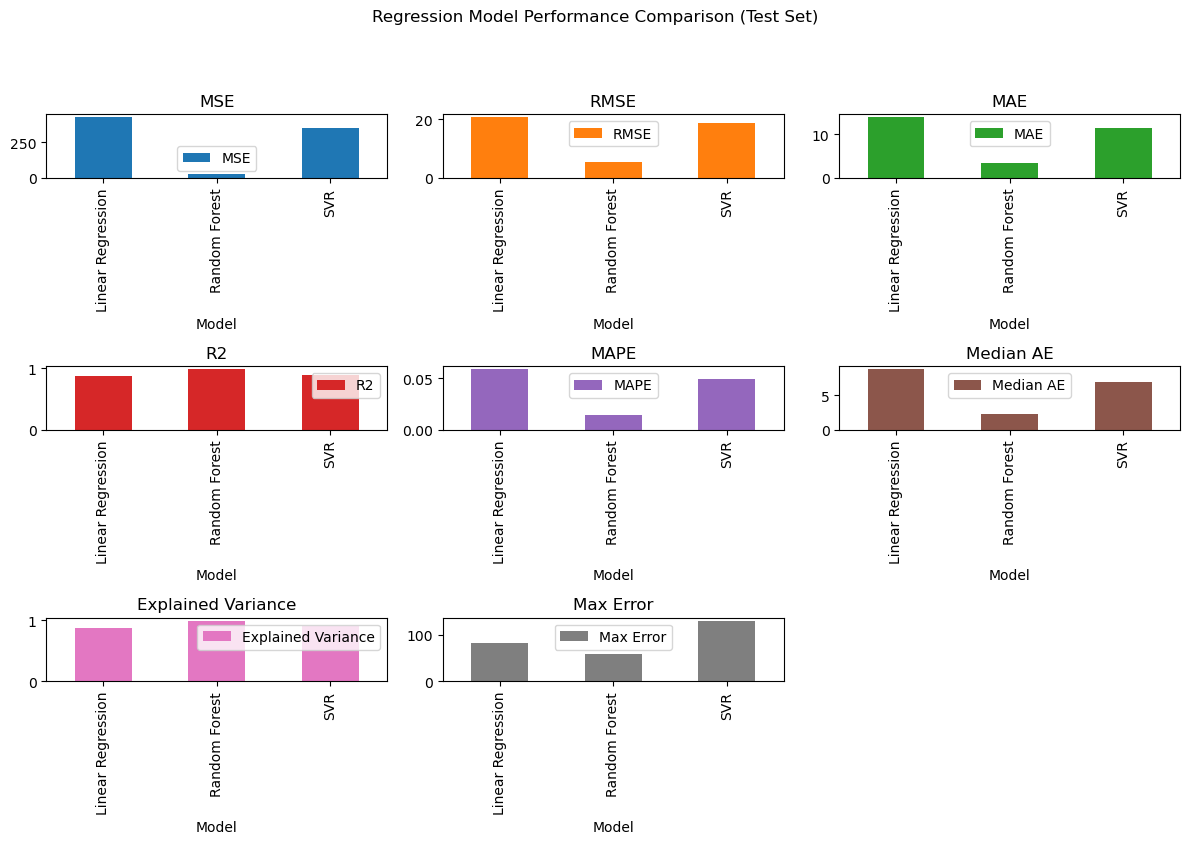

In [92]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y_new, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

# Initialize lists to store performance metrics
results = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': [],
    'MAPE': [],
    'Median AE': [],
    'Explained Variance': [],
    'Max Error': []
}

# Evaluate each model on the test set
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    exp_var = explained_variance_score(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    
    # Store results
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Median AE'].append(median_ae)
    results['Explained Variance'].append(exp_var)
    results['Max Error'].append(max_err)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("\nRegression Model Performance Comparison (Test Set):")
print(results_df)

# Visualize results
results_df.set_index('Model')[['MSE', 'RMSE', 'MAE', 'R2', 'MAPE', 'Median AE', 'Explained Variance', 'Max Error']].plot(
    kind='bar', figsize=(12, 8), subplots=True, layout=(3, 3), sharex=False, sharey=False
)
plt.suptitle('Regression Model Performance Comparison (Test Set)', y=1.05)
plt.tight_layout()
plt.show()


CPU Cycle Estimates (Test Set):
               Model  Training Cycles (est.)  Prediction Cycles (est.)  \
0  Linear Regression            4.687500e+07              0.000000e+00   
1      Random Forest            7.828125e+09              4.687500e+07   
2                SVR            5.156250e+09              1.875000e+09   

   Training Time (s)  Prediction Time (s)  
0           0.015625             0.000000  
1           2.609375             0.015625  
2           1.718750             0.625000  


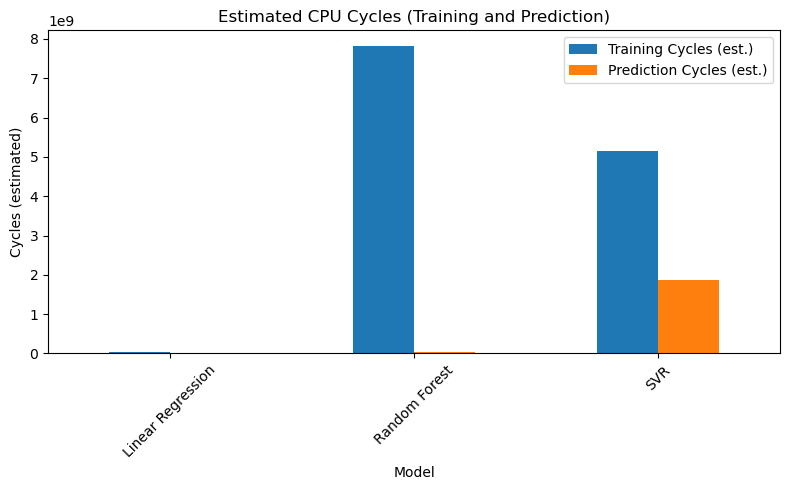

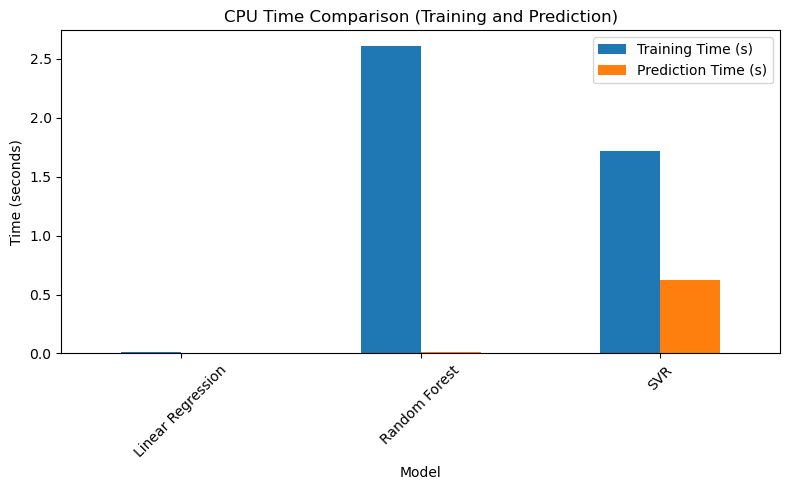

In [93]:
import time


# Separate function to measure CPU cycles (approximated via CPU time)
def measure_cpu_cycles(model, X_train, y_train, X_test, cpu_clock_speed=3e9):
    """
    Measure CPU time for training and prediction, and estimate CPU cycles.
    
    Parameters:
    - model: The machine learning model to evaluate.
    - X_train, y_train: Training data.
    - X_test: Test data for prediction.
    - cpu_clock_speed: CPU clock speed in Hz (default: 3.0 GHz = 3e9 cycles/second).
    
    Returns:
    - train_cycles: Estimated CPU cycles for training.
    - pred_cycles: Estimated CPU cycles for prediction.
    - train_time: CPU time for training (seconds).
    - pred_time: CPU time for prediction (seconds).
    """
    # Measure training time
    start_train_time = time.process_time()
    model.fit(X_train, y_train)
    end_train_time = time.process_time()
    train_time = end_train_time - start_train_time

    # Measure prediction time
    start_pred_time = time.process_time()
    y_pred = model.predict(X_test)
    end_pred_time = time.process_time()
    pred_time = end_pred_time - start_pred_time

    # Estimate CPU cycles
    train_cycles = train_time * cpu_clock_speed
    pred_cycles = pred_time * cpu_clock_speed

    return train_cycles, pred_cycles, train_time, pred_time, y_pred

results_cycles = {
    'Model': [],
    'Training Cycles (est.)': [],
    'Prediction Cycles (est.)': [],
    'Training Time (s)': [],
    'Prediction Time (s)': []
}

# Evaluate each model
for model_name, model in models.items():
    # Measure CPU cycles and get predictions using the separate function
    train_cycles, pred_cycles, train_time, pred_time, y_pred = measure_cpu_cycles(
        model, X_train, y_train, X_test
    )

    # Store CPU cycle metrics
    results_cycles['Model'].append(model_name)
    results_cycles['Training Cycles (est.)'].append(train_cycles)
    results_cycles['Prediction Cycles (est.)'].append(pred_cycles)
    results_cycles['Training Time (s)'].append(train_time)
    results_cycles['Prediction Time (s)'].append(pred_time)

cycles_df = pd.DataFrame(results_cycles)

# Print CPU cycle estimates
print("\nCPU Cycle Estimates (Test Set):")
print(cycles_df)

# Visualize CPU cycles in a separate figure
cycles_df.set_index('Model')[['Training Cycles (est.)', 'Prediction Cycles (est.)']].plot(
    kind='bar', figsize=(8, 5)
)
plt.title('Estimated CPU Cycles (Training and Prediction)')
plt.ylabel('Cycles (estimated)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize CPU times in another separate figure (optional)
cycles_df.set_index('Model')[['Training Time (s)', 'Prediction Time (s)']].plot(
    kind='bar', figsize=(8, 5)
)
plt.title('CPU Time Comparison (Training and Prediction)')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
import joblib
# Train and save models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"{model_name.lower().replace(' ', '_')}_model.pkl")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Models and scaler saved successfully.")

Models and scaler saved successfully.
